In [167]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

%matplotlib inline

In [168]:
raw_data = pd.read_csv('Iris.csv')

In [169]:
raw_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [170]:
raw_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [171]:
raw_data.drop(['Id'],axis=1,inplace=True)

In [172]:
raw_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [173]:
X = raw_data.iloc[:,0:-1]
y = raw_data.iloc[:,-1]

# Step1: Standardization

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
standardizer = StandardScaler()

In [176]:
X_std = standardizer.fit_transform(X)

# Step 2: Covariance Matrix computation

In [177]:
cov = np.cov(X_std.T)
cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

# Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

In [178]:
eig_val,eig_vec = np.linalg.eig(cov)

In [179]:
eig_val

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [180]:
eig_vec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [181]:
eigenValue_eigenVector_pairs = dict(zip(eig_val,eig_vec.T))
eigenValue_eigenVector_pairs

{2.9303537755893165: array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]),
 0.9274036215173417: array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]),
 0.1483422264816399: array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]),
 0.02074601399559571: array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627])}

[0.7277045209380134,
 0.23030523267680644,
 0.03683831957627389,
 0.005151926808906267]

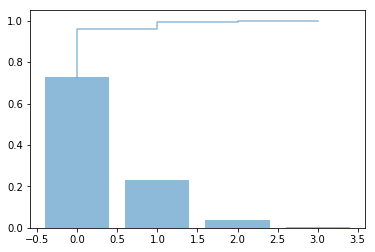

In [182]:
total_sum_eigenValues = sum(eig_val)
var_exp = [(i/total_sum_eigenValues) for i in sorted(eig_val,reverse=True)]
cum_var_exp = np.cumsum(var_exp) # This will show cumulative percentage of explained varaince for each feature
plt.bar(np.arange(len(eig_val)),var_exp,alpha=0.5,align='center',label='indivisual explained variance')
plt.step(np.arange(len(eig_val)),cum_var_exp,alpha=0.5,label='cumulative explained variance')
var_exp

In [183]:
var_exp_cum_var_exp_pairs = dict(zip(var_exp,cum_var_exp.T))
var_exp_cum_var_exp_pairs

{0.7277045209380134: 0.7277045209380134,
 0.23030523267680644: 0.9580097536148199,
 0.03683831957627389: 0.9948480731910938,
 0.005151926808906267: 1.0}

# Step 4: Feature vector

In [184]:
number_of_variables = int(input("Choose the number of variables: "))

Choose the number of variables: 2


In [185]:
reshaped_eigen_vectors = []
for i in range(number_of_variables):
    reshaped_eigen_vectors.append(eigenValue_eigenVector_pairs[eig_val[i]].reshape(len(eig_val),1))

In [186]:
tuple(reshaped_eigen_vectors)

(array([[ 0.52237162],
        [-0.26335492],
        [ 0.58125401],
        [ 0.56561105]]), array([[-0.37231836],
        [-0.92555649],
        [-0.02109478],
        [-0.06541577]]))

In [187]:
feature_vector = np.hstack(tuple(reshaped_eigen_vectors))
feature_vector

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

# Step 5: Recast the data along the principal components axes

In [188]:
final_dataset = np.dot(X_std,feature_vector)

In [189]:
final_dataset

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

In [190]:
colors = ['r','g','b']

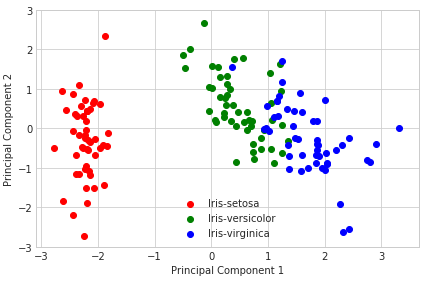

In [191]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for label,color in zip(np.unique(raw_data['Species']),colors):
        plt.scatter(final_dataset[raw_data['Species']==label,0],final_dataset[raw_data['Species']==label,1],c=color,label=label)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()

# Applying Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
lr = LogisticRegression()

In [194]:
lr.fit(final_dataset,pd.Categorical(raw_data['Species']).codes)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

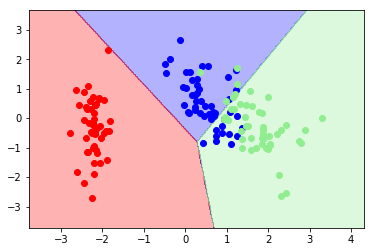

In [195]:
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(raw_data['Species'])])
x1_min, x1_max = final_dataset[:, 0].min() - 1, final_dataset[:, 0].max() + 1
x2_min, x2_max = final_dataset[:, 1].min() - 1, final_dataset[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
Z = lr.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
for idx, cl in enumerate(np.unique(np.array(pd.Categorical(raw_data['Species']).codes))):
    plt.scatter(x=final_dataset[raw_data['Species'] == cl, 0], 
                    y=final_dataset[raw_data['Species'] == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
for label,color in zip(np.unique(raw_data['Species']),colors):
        plt.scatter(final_dataset[raw_data['Species']==label,0],final_dataset[raw_data['Species']==label,1],c=color,label=label)